# INF421 PI 2021: Matching under constraints

By : Taha Hammadia & Styve Ngamou

For : M. Patrick Loiseau

## Disclaimer:

In this assessment, we may use terms that are not politicaly correct. By it, we mean no political statement and we are only discussing programing aspects.

## Task 1:

### Feasibility:

The definition of stability is the same for both problems.

### Fairness:

The definition of fairness is the same for both problems.

$ $

Since the two definitions coincide, it is sufficient to show that the Gale and Shapley definition of stability implies non-wastefulness and individual rationality:

### Non-wastefulness:

Let $\mu$ a matching. Suppose there is $(i, s) \in I \times S$ such that $s_{i} \gt _{i} \mu_{i}$ and $|\mu_{s}| < q_{s}$.

We have: $i >_{s} \emptyset$, therefore $\mu$ is unstable.

### Individual rationality:

???

## Task 2:

### Discussing the implementation:

Here, we simply implement the algoithm of Gale and Shapley adapted to many-to-matching problem where the ending condition must be ajusted.

### Choice of data structure:

We have opted to use class structures which helped us combine data over students and schools in an efficient way.

In the ```student``` class, the list prefStud helped us to have the rank of each school for the student. This choice of data structure makes the access to the ranking easier. 

In the ```school``` class, the list prefer containts the students ordered acording to the preference of the school. This choice of data structure makes the execution of the Gale and Shapley algorithm easier. Indeed, we only have to take the students by order of prefer.

In the main function ```mate```, the result is presented into the shape of a list of lists. Each list within the great list contains the students who has integrated the corresponding school. The last list corresponds to students who do not have a school.

In [1]:
class student2:
    """Definition of the class student"""
    
    def __init__(self, prefStud):
        """
        prefStud is a list that associates to each school its rank for the student.
        A case is added for including the choice of not joining any school at all.
        """
        self.prefStud = prefStud
        self.schlStud = len(prefStud) - 1
    
class school2:
    """Definition of the school class"""
    idx = 0
    n = 0
    def __init__(self, prefer, quota):
        """
        prefer contains the students ordered according to the preference of the school.
        """
        self.prefer = prefer
        self.quota = quota

In [2]:
def mate2(schools, students):
    N = len(students)
    m = len(schools)
    i = -1
     # since the algorithm goes through the preferences of the schools in decreasing order of
     # preference, we have a stable matching when all quotas are met.
    while True:
        for j in range(m):
            if schools[j].n < schools[j].quota and schools[i].idx < N:
                i = j
                break
        else:
            break
        while schools[i].n < schools[i].quota and schools[i].idx < N:
            stud = schools[i].prefer[schools[i].idx]
            if stud.prefStud[i] < stud.prefStud[stud.schlStud]:
                if stud.schlStud < m:
                    schools[stud.schlStud].n -= 1
                schools[i].n += 1
                stud.schlStud = i
            schools[i].idx += 1
    res = [list() for k in range(m + 1)]
    for k in range(N):
        res[students[k].schlStud].append(k)
    return res

### Complexity:

#### Complexity in time:

We count complexity in terms of how many times a "school asks a student".

In the algorithm, each student is asked by a school at most once, therefore the complexity is $O(N m)$, where $N$ is the number of students and $m$ the number of schools.

#### Complexity in memory:

For each one of the $N$ student, a list of $\Theta(m)$ number represent the ranking of schools. For each one of the $m$ schools, a list of $N$ pointers to elements of the class ```student```.

At the end, the space complexity is $\Theta(N m)$.

## Task 3:

### Discussing the implementation:

As before, we are adapting the Gale and Shapley algorithm to our problem. The ending condition is not changed; whereas a school cannot ask a person only if the number of waiting students of their group is strictly less than the quota of the group.

### Choice of data structure:

We use the same structures as before. Moreover, in order to account for group, we add an attribute group in the ```student``` class and a list in the ```school``` class that correponds to the number of people of each group.

In [3]:
class student3:
    """Definition of the class student"""
    
    def __init__(self, prefStud, grp):
        """
        prefStud is a list that associates to each school its rank for the student.
        A case is added for including the choice of not joining any school at all.
        """
        self.prefStud = prefStud
        self.schlStud = len(prefStud) - 1
        self.grp = grp
    
class school3:
    """Definition of the school class"""
    idx = 0
    n = 0
    def __init__(self, prefer, quota, quota_grp):
        """
        prefer contains the students ordered according to the preference of the school.
        """
        self.prefer = prefer
        self.quota = quota
        self.quota_grp = quota_grp
        self.n_grp = [0] * len(quota_grp)

In [4]:
def mate3(schools, students):
    N = len(students)
    m = len(schools)
    i = -1
     # since the algorithm goes through the preferences of the schools in decreasing order of
     # preference, we have a stable matching when all quotas are met.
    while True:  # stop condition unmodified
        for j in range(m):
            if schools[j].n < schools[j].quota and schools[i].idx < N:
                i = j
                break
        else:
            break
        while schools[i].n < schools[i].quota and schools[i].idx < N:
            stud = schools[i].prefer[schools[i].idx]
            if schools[i].n_grp[stud.grp] < schools[i].quota_grp[stud.grp]:
                if stud.prefStud[i] < stud.prefStud[stud.schlStud]:
                    if stud.schlStud < m:
                        schools[stud.schlStud].n -= 1
                        schools[i].n_grp[stud.grp] -= 1
                    schools[i].n += 1
                    stud.schlStud = i
            schools[i].idx += 1
    res = [list() for k in range(m + 1)]
    for k in range(N):
        res[students[k].schlStud].append(k)
    return res

## Task 4:

In [5]:
import matplotlib.pyplot as plt

In [6]:
def transf(match):
    res = [], []
    for i in range(len(match) - 1):
        for stud in match[i]:
            res[0].append(stud)
            res[1].append(i)
    return res

def represent(match, col):
    res = transf(match)
    plt.scatter(res[0], res[1], c = col)
    plt.title("Matching of students to schools")
    plt.xlabel("Student")
    plt.ylabel("School")
    plt.show()
    plt.close()

### Test Instance 1:

#### Test Task 2:

In [7]:
stud1 = student2([1, 2, 3])
stud2 = student2([2, 1, 3])
stud3 = student2([1, 3, 2])
stud4 = student2([3, 1, 2])

In [8]:
s1 = school2([stud4, stud3, stud2, stud1], 2)
s2 = school2([stud4, stud3, stud2, stud1], 2)

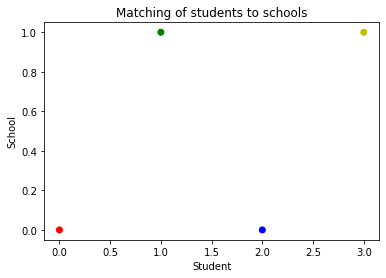

In [9]:
represent(mate2([s1, s2], [stud1, stud2, stud3, stud4]), ['r', 'b', 'g', 'y'])

#### Test Task 3:

In [10]:
stud1 = student3([1, 2, 3], 0)
stud2 = student3([2, 1, 3], 0)
stud3 = student3([1, 3, 2], 0)
stud4 = student3([3, 1, 2], 1)

In [11]:
s1 = school3([stud4, stud3, stud2, stud1], 2, [2, 2])
s2 = school3([stud4, stud3, stud2, stud1], 2, [2, 2])

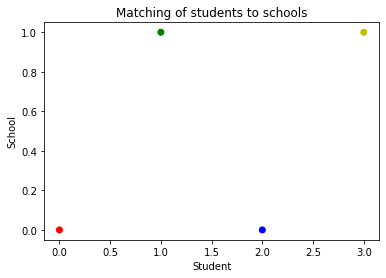

In [12]:
represent(mate3([s1, s2], [stud1, stud2, stud3, stud4]), ['r', 'b', 'g', 'y'])

### Test instance 2:

In [13]:
from random import gauss, random
from math import sqrt

In [14]:
def app(studs, grp):
    s = random()
    if s >= 0.5 : choice = [1, 2]
    else: choice = [2, 1]
    studs.append(student3(choice, grp))

def rand_instance2(n):
    """
    mate2 works with arguments of the classes school3 and student3.
    """ 
    studs = []
    ranQty = []
    m = int(9 * n / 10)
    for k in range(m + 1):
        app(studs, 0)
        ranQty.append((k, gauss(0, 1)))
    for k in range(m + 1, n):
        app(studs, 1)
        ranQty.append((k, gauss(0, 1)))
    ranQty1 = [(k, ranQty[k][1] + gauss(0, 1)) for k in range(n)]
    ranQty2 = [(k, ranQty[k][1] + gauss(0, 1)) for k in range(n)]
    
    ranQty1.sort(key = lambda x : -x[1]) # decreasing order of observed quality
    ranQty2.sort(key = lambda x : -x[1])
    
    s1 = school3([studs[elt[0]] for elt in ranQty1], n // 4, [int(0.9 * n / 4), int(0.9 * n / 4)])
    s2 = school3([studs[elt[0]] for elt in ranQty2], n // 4, [int(0.9 * n / 4), int(0.9 * n / 4)])
    
    return [s1, s2], studs

def analyse2_2(n, rand_inst):
    res = mate2(rand_inst[0], rand_inst[1])
    cptA, cptB = 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                else: cptB += 1
    return n, cptA, cptB


def analyse2_3(n, rand_inst):
    res = mate3(rand_inst[0], rand_inst[1])
    cptA, cptB = 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                else: cptB += 1
    return n, cptA, cptB

#### Test Task 2:

In [15]:
def printAnalyse2_2(n):
    m = int(9 * n / 10)
    N = 200

    cpta, cptb = 0, 0

    for _ in range(N):
        rand_inst = rand_instance2(n)
        n, cptA, cptB = analyse2_2(n, rand_inst)
        cpta += cptA
        cptb += cptB
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m / N * 10000) / 100, "%")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (n - m) / N * 10000) / 100, "%")
    print("_______")

In [16]:
printAnalyse2_2(1000)
printAnalyse2_2(2000)
printAnalyse2_2(3000)

1000 :
Average of cptA: 675.835
Percentage of A's to get their first choice: 75.09 %
Average of cptB :  74.515
Percentage of B's to get their first choice: 74.51 %
_______
2000 :
Average of cptA: 1350.55
Percentage of A's to get their first choice: 75.03 %
Average of cptB :  148.81
Percentage of B's to get their first choice: 74.4 %
_______
3000 :
Average of cptA: 2026.395
Percentage of A's to get their first choice: 75.05 %
Average of cptB :  223.935
Percentage of B's to get their first choice: 74.64 %
_______


The fraction of people getting their first choices seems independent from the number n or their class. Nearly three fourths of students get their first choice.

#### Test Task 3:

In [17]:
def printAnalyse2_3(n):
    m = int(9 * n / 10)
    N = 200

    cpta, cptb = 0, 0

    for _ in range(N):
        rand_inst = rand_instance2(n)
        n, cptA, cptB = analyse2_3(n, rand_inst)
        cpta += cptA
        cptb += cptB
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m / N * 10000) / 100, "%")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (n - m) / N * 10000) / 100, "%")
    print("_______")

In [18]:
printAnalyse2_3(1000)
printAnalyse2_3(2000)
printAnalyse2_3(3000)

1000 :
Average of cptA: 677.37
Percentage of A's to get their first choice: 75.26 %
Average of cptB :  74.535
Percentage of B's to get their first choice: 74.53 %
_______
2000 :
Average of cptA: 1349.425
Percentage of A's to get their first choice: 74.96 %
Average of cptB :  149.915
Percentage of B's to get their first choice: 74.95 %
_______
3000 :
Average of cptA: 2023.525
Percentage of A's to get their first choice: 74.94 %
Average of cptB :  224.71
Percentage of B's to get their first choice: 74.9 %
_______


The fraction of people getting their first choices seems independent from the number n or their class. Nearly three fourths of students get their first choice.

### Test instance 3:

In [19]:
def app(studs, grp):
    s = random()
    if s >= 0.5 : choice = [1, 2]
    else: choice = [2, 1]
    studs.append(student3(choice, grp))

def rand_instance3(n):
    """
    mate2 works with arguments of the classes school3 and student3.
    """ 
    studs = []
    ranQty = []
    m1 = n // 2
    m2 = int(4 * n / 5)
    m3 = int(19 * n / 20)
    for k in range(m1 + 1):
        app(studs, 0)
        ranQty.append((k, gauss(0, 1)))
    for k in range(m1 + 1, m2 + 1):
        app(studs, 1)
        ranQty.append((k, gauss(0, 1)))
    for k in range(m2 + 1, m3 + 1):
        app(studs, 2)
        ranQty.append((k, gauss(0, 1)))
    for k in range(m3 + 1, n):
        app(studs, 3)
        ranQty.append((k, gauss(0, 1)))
    ranQty1 = [(k, ranQty[k][1] + gauss(0, 1)) for k in range(n)]
    ranQty2 = [(k, ranQty[k][1] + gauss(0, 1)) for k in range(n)]
    
    ranQty1.sort(key = lambda x : -x[1]) # decreasing order of observed quality
    ranQty2.sort(key = lambda x : -x[1])
    
    s1 = school3([studs[elt[0]] for elt in ranQty1], n // 4, [int(0.9 * n / 4), int(0.9 * n / 4), int(0.9 * n / 4), int(0.9 * n / 4)])
    s2 = school3([studs[elt[0]] for elt in ranQty2], n // 4, [int(0.9 * n / 4), int(0.9 * n / 4), int(0.9 * n / 4), int(0.9 * n / 4)])
    
    return [s1, s2], studs

def analyse3_2(n, rand_inst):
    res = mate2(rand_inst[0], rand_inst[1])
    cptA, cptB, cptC, cptD = 0, 0, 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                elif rand_inst[1][elt].grp == 1: cptB += 1
                elif rand_inst[1][elt].grp == 2: cptC += 1
                else: cptD += 1
    return n, cptA, cptB, cptC, cptD


def analyse3_3(n, rand_inst):
    res = mate3(rand_inst[0], rand_inst[1])
    cptA, cptB, cptC, cptD = 0, 0, 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                elif rand_inst[1][elt].grp == 1: cptB += 1
                elif rand_inst[1][elt].grp == 2: cptC += 1
                else: cptD += 1
    return n, cptA, cptB, cptC, cptD

#### Test Task 2:

In [20]:
def printAnalyse3_2(n):
    m1 = n // 2
    m2 = int(4 * n / 5)
    m3 = int(19 * n / 20)
    N = 200

    cpta, cptb, cptc, cptd = 0, 0, 0, 0

    for _ in range(N):
        rand_inst = rand_instance3(n)
        n, cptA, cptB, cptC, cptD = analyse3_2(n, rand_inst)
        cpta += cptA
        cptb += cptB
        cptc += cptC
        cptd += cptD
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m1 / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (m2 - m1) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptC : ", cptc / N)
    print("Percentage of C's to get their first choice:", int(cptc / (m3 - m2) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptD : ", cptd / N)
    print("Percentage of D's to get their first choice:", int(cptd / (n - m3) / N * 10000) / 100, "%")
    print("_______")

In [21]:
printAnalyse3_2(1000)
printAnalyse3_2(2000)
printAnalyse3_2(3000)

1000 :
Average of cptA: 375.075
Percentage of A's to get their first choice: 75.01 %
_______
Average of cptB :  225.39
Percentage of B's to get their first choice: 75.13 %
_______
Average of cptC :  112.285
Percentage of C's to get their first choice: 74.85 %
_______
Average of cptD :  36.615
Percentage of D's to get their first choice: 73.23 %
_______
2000 :
Average of cptA: 751.395
Percentage of A's to get their first choice: 75.13 %
_______
Average of cptB :  450.02
Percentage of B's to get their first choice: 75.0 %
_______
Average of cptC :  225.1
Percentage of C's to get their first choice: 75.03 %
_______
Average of cptD :  73.75
Percentage of D's to get their first choice: 73.75 %
_______
3000 :
Average of cptA: 1127.745
Percentage of A's to get their first choice: 75.18 %
_______
Average of cptB :  676.55
Percentage of B's to get their first choice: 75.17 %
_______
Average of cptC :  336.395
Percentage of C's to get their first choice: 74.75 %
_______
Average of cptD :  112.1


The fraction of people getting their first choices seems independent from the number n or their class. Nearly three fourths of students get their first choice.

#### Test Task 3:

In [22]:
def printAnalyse3_3(n):
    m1 = n // 2
    m2 = int(4 * n / 5)
    m3 = int(19 * n / 20)
    N = 200

    cpta, cptb, cptc, cptd = 0, 0, 0, 0

    for _ in range(N):
        rand_inst = rand_instance3(n)
        n, cptA, cptB, cptC, cptD = analyse3_3(n, rand_inst)
        cpta += cptA
        cptb += cptB
        cptc += cptC
        cptd += cptD
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m1 / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (m2 - m1) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptC : ", cptc / N)
    print("Percentage of C's to get their first choice:", int(cptc / (m3 - m2) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptD : ", cptd / N)
    print("Percentage of D's to get their first choice:", int(cptd / (n - m3) / N * 10000) / 100, "%")
    print("_______")

In [23]:
printAnalyse3_3(1000)
printAnalyse3_3(2000)
printAnalyse3_3(3000)

1000 :
Average of cptA: 375.94
Percentage of A's to get their first choice: 75.18 %
_______
Average of cptB :  224.94
Percentage of B's to get their first choice: 74.98 %
_______
Average of cptC :  111.96
Percentage of C's to get their first choice: 74.63 %
_______
Average of cptD :  36.835
Percentage of D's to get their first choice: 73.67 %
_______
2000 :
Average of cptA: 752.13
Percentage of A's to get their first choice: 75.21 %
_______
Average of cptB :  450.385
Percentage of B's to get their first choice: 75.06 %
_______
Average of cptC :  223.75
Percentage of C's to get their first choice: 74.58 %
_______
Average of cptD :  74.14
Percentage of D's to get their first choice: 74.14 %
_______
3000 :
Average of cptA: 1126.335
Percentage of A's to get their first choice: 75.08 %
_______
Average of cptB :  676.325
Percentage of B's to get their first choice: 75.14 %
_______
Average of cptC :  337.365
Percentage of C's to get their first choice: 74.97 %
_______
Average of cptD :  112.2

The fraction of people getting their first choices seems independent from the number n or their class. Nearly three fourths of students get their first choice.

## Task 5:

### Discussing the implementation:

The basic idea is to keep sure that we do add a person of a lacking group and do not add a person of a group in excess. For this, we use two lists ```lim_inf``` and ```lim_sup``` that keep track of groups that have reached the minimum porpotion limit or the maximum proportion limit respectively.

When this is the case, we take the first adequate person in the ranking list give them the position and then move all the intermediary people by one downward. In the case where no more elements of the lacking group are to be found, we basically do not act.

### Choice of data structure:

We have chosen, in respect with the structure of the class ```school```, that the list of preferences is the ranking of students from the most prefered to the least. Proportions is represented by a list. Moreover, the list ```cpt``` keeps track of the number of classified people in order to optimize the counting.

In [24]:
def fair_rank(L, prop):
    """
    L is a list of ranked students from the most preferred school to the least preferred by the school.
    prop is the list of proportions of the groups in the population.
    This function is a procedure that acts directly on the list of preferences.
    """
    r = 0.8
    R = 1.2
    n = len(prop) # number of groups
    N = len(L) # number of students
    cpt = [0] * n
    cpt[L[0].grp] = 1
    for k in range(1, len(L)):
        lim_inf = [False] * n
        lim_sup = [False] * n
        act = False
        for i in range(n):
            if cpt[i] / (k + 1) <= r * prop[i]:
                lim_inf[i] = True
                act = True
            if cpt[i] / (k + 1) >= R * prop[i]:
                lim_sup[i] = True
                act = True
        if act:
            for j in range(k, N):
                if lim_sup[L[j].grp]: continue
                if lim_inf[L[j].grp]:
                    temp = L[j]
                    for l in range(j-1, k-1, -1):
                        L[l + 1] = L[l]
                    L[k] = temp
                    break
        cpt[L[k].grp] += 1  # keeping track of the number of people of each group

### Complexity estimation:

#### Time complexity:

At first look, we might say that the time complexity is $O(N (n + N))$, where $n$ is the number of groups and $N$ the number of students.

However, $n \le N$, therfore the complexity is $O(N^2)$.

#### Space complexity:

We have used 5 lists of length n or N. Therefore, the space complexity is $\Theta(N)$.

## Task 6:

In [25]:
def test(rand_inst,prop):
    r = 0.8
    R = 1.2
    n = len(prop)
    res = mate2(rand_inst[0], rand_inst[1])
    ret = []
    for s in [0, 1]:
        cpt = [0] * n
        Ns = len(res[s])
        for elt in res[s]:
            cpt[rand_inst[1][elt].grp] += 1
        for i in range(n):
            if (cpt[i] - 1) / Ns < r or (cpt[i] + 1) / Ns > R:
                ret.append(False)
        ret.append(True)
    return ret

### Test instance 2:

In [26]:
prop2 = [0.9, 0.1]

In [27]:
def printAnalyse6_2(n):
    
    N = 200
    
    for _ in range(N):
        rand_inst = rand_instance2(n)
        fair_rank(rand_inst[0][0].prefer, prop2)
        fair_rank(rand_inst[0][1].prefer, prop2)
    boolean = test(rand_inst, prop2)
    print(n, ":")
    print("s1 verifies the 4/5 - rule ", boolean[0])
    print("s2 verifies the 4/5 - rule ", boolean[1])
    print("________________")

In [28]:
printAnalyse6_2(1000)
printAnalyse6_2(2000)
printAnalyse6_2(3000)

1000 :
s1 verifies the 4/5 - rule  False
s2 verifies the 4/5 - rule  True
________________


KeyboardInterrupt: 

##### Remark:

The schools do not satistfy rigourously the 4/5-rule because there are not enough candidates.

### Test instance 3:

In [29]:
prop3 = [0.5, 0.3, 0.15, 0.05]

In [30]:
def printAnalyse6_3(n):
    
    N = 200
    
    for _ in range(N):
        rand_inst = rand_instance3(n)
        fair_rank(rand_inst[0][0].prefer, prop3)
        fair_rank(rand_inst[0][1].prefer, prop3)
    boolean = test(rand_inst, prop3)
    print(n, ":")
    print("s1 verifies the 4/5 - rule ", boolean[0])
    print("s1 verifies the 4/5 - rule ", boolean[1])
    print("________________")

In [ ]:
printAnalyse6_3(1000)
printAnalyse6_3(2000)
printAnalyse6_3(3000)

##### Remark:

The schools do not satistfy rigourously the 4/5-rule because there are not enough candidates.

## Task 7:

### Discussing the implementation:

Here, for memory efficiency and for avoiding useless search, we suppose that ```feasability``` is a function that returns whether a demand set is feasible for a school or not.

In order to make the definition of the demand function faster, we will compute a table that yields for each pair (school $s$, student $i$) the value of $p_{s}$ such that: $i = i^{(s, p_{s})}$.

Moreover, we can observe that once we find a feasible demand for a school, it will be the demand returned by the algorithm.

In [31]:
def i_s_ps(schools, students):
    """
    Returns a table that gives for each pair (i, s) the p such as i = i^(s, p).
    """
    I = len(students)
    res = []
    for s in range(len(schools)):
        line = {}
        for i in range(I):
            line[schools[s].prefer[i]] = I - i
        res.append(line)
    return res

In [32]:
def demand(studs, table, s, P):
    """
    Returns the demand set for the school s using the table defined above.
    """
    res = []
    m = len(table)
    for i in range(len(table[0])):
        if table[s][studs[i]] >= P[s]:
            if studs[i].prefStud[s] < studs[i].prefStud[studs[i].schlStud]:
                for s_prime in range(m):
                    if table[s_prime][studs[i]] >= P[s] and studs[i].prefStud[s] > studs[i].prefStud[s_prime]:
                        break
                else:
                    res.append(i)
    return res

In [33]:
def T(P, res, studs, schools, table, feasability):
    """
    feasability is a function.
    """
    test = False
    I = len(studs)
    for s in range(len(table)):
        if res[s][0]:
            if P[s] == I + 1: continue
            res[s][1] = demand(studs, table, s, P)
            if not feasability(schools[s], res[s][1], studs): 
                P[s] += 1
                test = True
            else:
                res[s][0] = False
    return test

In [34]:
def fixed_algo(studs, schools, feasability):
    """
    We will use the observation that once we find a feasible demand for a
    school, it will be the demand returned by the algorithm.
    """
    table = i_s_ps(schools, studs)
    res = [[True, None] for s in range(len(schools))]
    P = [1] * len(schools)
    while T(P, res, studs, schools, table, feasability):
        continue
    return [res[s][1] for s in range(len(schools))]

### Complexity estimation:

#### Time complexity:

Let us note $\mathcal{F}$ the worst case time complexity of the feasability function when applied to our data.

Building the table is of time complexity $\Theta(|I| |S|)$. 

Each execution of the function ```demand``` is of time complexity $O(|I| |S|)$. 

Therefore, the time complexity of one call of ```T``` is $O(|I| |S| |S| \mathcal{F}) = O(|I| |S|^{2} \mathcal{F})$, depending of whether or not we call ```demand```.

Now, we must determine the number of times we must run ```T``` with a ```demand``` call. Since we are working with a general ```feasability``` function, we can at least say that it is $O(|I| |S|)$ times.

In conclusion, we can say that in worst cases, the complexity is $O(|I|^{2} |S|^{3} \mathcal{F})$.

#### Space complexity:

A "student" has space complexity of $\Theta(|\mathcal{G}| + |S|)$.

A "school" has space complexity of $\Theta(|\mathcal{G}| + |I|)$.

The arguments of the code of complexity $\Theta(|S| |I| + |\mathcal{G}| |S| + |I|)$, i.e. $O(|I|^{2} + |I| |S|)$.

Since the remaining elements are only $O(|I| |S|)$ pointers to the arguments, the total space complexity is $O(|I|^{2} +|I| |S|)$.

## Task 8:

In [35]:
def feasability8(school, students, studsInfo):
    return school.quota >= len(students)

### Test Instance 1:

In [36]:
stud1 = student2([1, 2, 3])
stud2 = student2([2, 1, 3])
stud3 = student2([1, 3, 2])
stud4 = student2([3, 1, 2])

In [37]:
s1 = school2([stud4, stud3, stud2, stud1], 2)
s2 = school2([stud4, stud3, stud2, stud1], 2)

In [ ]:
represent(fixed_algo([stud1, stud2, stud3, stud4], [s1, s2], feasability8) + [[]], ['r', 'b', 'g', 'y'])

We see that we get the same result as previously.

### Test Instance 2:

In [38]:
def analyse8_2(n, rand_inst):
    res = fixed_algo(rand_inst[1], rand_inst[0], feasability8)
    cptA, cptB = 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                else: cptB += 1
    return n, cptA, cptB

In [39]:
def printAnalyse8_2(n):
    m = int(9 * n / 10)
    N = 200

    cpta, cptb = 0, 0

    for _ in range(N):
        rand_inst = rand_instance2(n)
        n, cptA, cptB = analyse8_2(n, rand_inst)
        cpta += cptA
        cptb += cptB
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m / N * 10000) / 100, "%")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (n - m) / N * 10000) / 100, "%")
    print("_______")

In [ ]:
printAnalyse8_2(1000)
printAnalyse8_2(2000)
printAnalyse8_2(3000)

We observe a sharp decrease in the number of people getting their first choice since it went from nearly $75\%$ when we used the task $2$ implementation to roughly $25\%$.

### Test Instance 3:

In [40]:
def analyse8_3(n, rand_inst):
    res = fixed_algo(rand_inst[1], rand_inst[0], feasability8)
    cptA, cptB, cptC, cptD = 0, 0, 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                elif rand_inst[1][elt].grp == 1: cptB += 1
                elif rand_inst[1][elt].grp == 2: cptC += 1
                else: cptD += 1
    return n, cptA, cptB, cptC, cptD

In [41]:
def printAnalyse8_3(n):
    m1 = n // 2
    m2 = int(4 * n / 5)
    m3 = int(19 * n / 20)
    N = 200

    cpta, cptb, cptc, cptd = 0, 0, 0, 0

    for _ in range(N):
        rand_inst = rand_instance3(n)
        n, cptA, cptB, cptC, cptD = analyse8_3(n, rand_inst)
        cpta += cptA
        cptb += cptB
        cptc += cptC
        cptd += cptD
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m1 / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (m2 - m1) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptC : ", cptc / N)
    print("Percentage of C's to get their first choice:", int(cptc / (m3 - m2) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptD : ", cptd / N)
    print("Percentage of D's to get their first choice:", int(cptd / (n - m3) / N * 10000) / 100, "%")
    print("_______")

In [ ]:
printAnalyse8_3(1000)
printAnalyse8_3(2000)
printAnalyse8_3(3000)

We observe a sharp decrease in the number of people getting their first choice since it went from nearly $75\%$ when we used the task $2$ implementation to roughly $25\%$.

## Task 9:

In [42]:
def feasability9(school, students, studsInfo):
    if len(students) > school.quota: return False
    cpt = [0] * len(school.quota_grp)
    for elt in students:
        if cpt[studsInfo[elt].grp] >= school.quota_grp[studsInfo[elt].grp]:
            return False
        cpt[studsInfo[elt].grp] += 1
    return True

### Test Instance 1:

In [43]:
stud1 = student3([1, 2, 3], 0)
stud2 = student3([2, 1, 3], 0)
stud3 = student3([1, 3, 2], 0)
stud4 = student3([3, 1, 2], 1)

In [44]:
s1 = school3([stud4, stud3, stud2, stud1], 2, [2, 2])
s2 = school3([stud4, stud3, stud2, stud1], 2, [2, 2])

In [ ]:
represent(fixed_algo([stud1, stud2, stud3, stud4], [s1, s2], feasability9) + [[]], ['r', 'b', 'g', 'y'])

We see that we get the same result as previously.

### Test Instance 2:

In [45]:
def analyse9_2(n, rand_inst):
    res = fixed_algo(rand_inst[1], rand_inst[0], feasability9)
    cptA, cptB = 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                else: cptB += 1
    return n, cptA, cptB

In [46]:
def printAnalyse9_2(n):
    m = int(9 * n / 10)
    N = 200

    cpta, cptb = 0, 0

    for _ in range(N):
        rand_inst = rand_instance2(n)
        n, cptA, cptB = analyse9_2(n, rand_inst)
        cpta += cptA
        cptb += cptB
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m / N * 10000) / 100, "%")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (n - m) / N * 10000) / 100, "%")
    print("_______")

In [ ]:
printAnalyse9_2(1000)
printAnalyse9_2(2000)
printAnalyse9_2(3000)

We observe a sharp decrease in the number of people getting their first choice since it went from nearly $75\%$ to roughly $25\%$.

### Test Instance 3:

In [47]:
def analyse9_3(n, rand_inst):
    res = fixed_algo(rand_inst[1], rand_inst[0], feasability9)
    cptA, cptB, cptC, cptD = 0, 0, 0, 0
    for s in [0, 1]:
        for elt in res[s]:
            if rand_inst[1][elt].prefStud[s] == 1:
                if rand_inst[1][elt].grp == 0: cptA += 1
                elif rand_inst[1][elt].grp == 1: cptB += 1
                elif rand_inst[1][elt].grp == 2: cptC += 1
                else: cptD += 1
    return n, cptA, cptB, cptC, cptD

In [48]:
def printAnalyse9_3(n):
    m1 = n // 2
    m2 = int(4 * n / 5)
    m3 = int(19 * n / 20)
    N = 200

    cpta, cptb, cptc, cptd = 0, 0, 0, 0

    for _ in range(N):
        rand_inst = rand_instance3(n)
        n, cptA, cptB, cptC, cptD = analyse9_3(n, rand_inst)
        cpta += cptA
        cptb += cptB
        cptc += cptC
        cptd += cptD
    print(n, ":")
    print("Average of cptA:", cpta / N)
    print("Percentage of A's to get their first choice:", int(cpta / m1 / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptB : ", cptb / N)
    print("Percentage of B's to get their first choice:", int(cptb / (m2 - m1) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptC : ", cptc / N)
    print("Percentage of C's to get their first choice:", int(cptc / (m3 - m2) / N * 10000) / 100, "%")
    print("_______")
    print("Average of cptD : ", cptd / N)
    print("Percentage of D's to get their first choice:", int(cptd / (n - m3) / N * 10000) / 100, "%")
    print("_______")

In [49]:
printAnalyse9_3(1000)
printAnalyse9_3(2000)
printAnalyse9_3(3000)

KeyboardInterrupt: 

We observe a sharp decrease in the number of people getting their first choice since it went from nearly $75\%$ to roughly $25\%$.

## Task 10:

We will try to run the codes we previously run for testing the capacity constraints and the maximum quota constraint feasability condition.

We suppose that the result will not be ```individually rational```. It can be understood since many schools will end up without a student.

In [50]:
def feasability10(school, students, studsInfo):
    cpt = [0] * len(school.quota_grp)
    for elt in students:
        cpt[studsInfo[elt].grp] += 1
    for g in range(len(school.quota_grp)):
        if cpt[g] < 0.8 * school.quota_grp[g] or cpt[g] > 1.2 * school.quota_grp[g]:
            return False
    return True

### Test Instance 1:

In [56]:
stud1 = student3([1, 2, 3], 0)
stud2 = student3([2, 1, 3], 0)
stud3 = student3([1, 3, 2], 0)
stud4 = student3([3, 1, 2], 1)

In [57]:
s1 = school3([stud4, stud3, stud2, stud1], 2, [2, 2])
s2 = school3([stud4, stud3, stud2, stud1], 2, [2, 2])

In [59]:
fixed_algo([stud1, stud2, stud3, stud4], [s1, s2], feasability10)

([[], [3]], [5, 5])

### Test Instance 2:

In [51]:
def analyse10_2(n, rand_inst):
    P = fixed_algo(rand_inst[1], rand_inst[0], feasability10)
    for elt in P:
        if elt == len(rand_inst[1]) + 1:
            return True
    return False

In [52]:
def printAnalyse10_2(n):
    N = 200

    cpt = 0

    for _ in range(N):
        rand_inst = rand_instance2(n)
        cpt += analyse10_2(n, rand_inst)
    print("n = ", n, "frac = ", cpt / N)

In [ ]:
printAnalyse10_2(1000)
printAnalyse10_2(2000)
printAnalyse10_2(3000)

### Test Instance 3:

In [53]:
def analyse10_3(n, rand_inst):
    P = fixed_algo(rand_inst[1], rand_inst[0], feasability10)
    for elt in P:
        if elt == len(rand_inst[1]) + 1:
            return True
    return False

In [54]:
def printAnalyse10_3(n):
    N = 200

    cpt = 0

    for _ in range(N):
        rand_inst = rand_instance3(n)
        cpt += analyse10_3(n, rand_inst)
    print("n = ", n, "frac = ", cpt / N)

In [55]:
printAnalyse10_3(1000)
printAnalyse10_3(2000)
printAnalyse10_3(3000)

n =  1000 frac =  1.0


KeyboardInterrupt: 